<font size="6"><span style='color:#1984c5'><b>Customer Churn Analysis</b></span></font>

---
<font size="6"><span style='color:#1984c5'><b># Data Understanding and Exploration:</b></span></font>

---

## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

## Import dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Look into the dataset

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<div class="alert alert-block alert-warning">
<b>Notice:</b><br> Here, TotalCharges column is in object data type. But, It should be in a numeric form like int, float or just numeric. <br>For this, I will change the datatype.
</div>

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<div class="alert alert-block alert-info">
<b>Report:</b> 
    <ul>
        <li>Total records with no missing values: 7043</li>
        <li>Average Monthly charges: 64.76, average tenure: 32.37</li>
        <li>Minimum Monthly charges: 18.25, Minimum total charges: 18.8 (almost the same as Monthly charges)</li>
        <li>5% of customers pay 89.8 Monthly charges, 55% of customer are staying from 55 month</li>
        <li>Maximum monthly charges payout: 118.75</li>
        <li>Total charges are missing as it is in object type. I need to convert it in order to get information</li>
    </ul>
</div>

### Copy original data to clean the data

In [9]:
cda = df.copy()

## Data Cleaning

### Convert datatype of TotalCharges

In [10]:
cda.TotalCharges = pd.to_numeric(cda.TotalCharges, errors = 'coerce')

In [11]:
cda.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Checking missing values

In [12]:
cda.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<div class="alert alert-block alert-warning">
<b>Notice:</b> <br>Here, TotalCharges column has 11 null values. As, it is a small amount I can delete those rows. But in this project I will not drop these rows. I will keep it. And to keep it I will fill the missing value with one of the median or mode.
    Lets see...
</div>

### Handling missing value 

In [13]:
cda.loc[cda['TotalCharges'].isnull()== True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
cda['MonthlyCharges'].corr(cda['TotalCharges'])

0.6510648032262024

<div class="alert alert-warning">
<b>Notice:</b> <br>I am checking whether there is any correlation between Monthly charges and Total charges. I think it is safe to say  0.65 is a good correlation. Thats why I decide to replace NaN values with Monthly charges median.
</div>

In [15]:
cda[cda['MonthlyCharges'].between(19, 25)].median()

SeniorCitizen       0.000
tenure             22.000
MonthlyCharges     20.050
TotalCharges      460.225
dtype: float64

In [16]:
cda[cda['MonthlyCharges'].between(50, 80)].median()

SeniorCitizen        0.00
tenure              22.00
MonthlyCharges      69.20
TotalCharges      1395.05
dtype: float64

In [17]:
cda['TotalCharges'] = np.where((cda['TotalCharges'].isnull()) & (cda['MonthlyCharges'].between(19, 26)), 460.225, cda['TotalCharges'])


In [18]:
# cda.loc[cda['TotalCharges'].isnull()== True]

In [19]:
cda['TotalCharges'] = np.where((cda['TotalCharges'].isnull()) & (cda['MonthlyCharges'].between(52, 81)), 1395.05, cda['TotalCharges'])

In [20]:
cda.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
cda.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.116754
std,0.368612,24.559481,30.090047,2265.747871
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1395.050000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


<div class="alert alert-block alert-info">
<b>Report:</b> 
    <ul>
        <li>Total records with no missing values: 7043</li>
        <li>Average Monthly charges: 64.76, Total charges: 2281</li>
        <li>Minimum Monthly charges: 18.25, Minimum total charges: 18.8 (almost the same as Monthly charges)</li>
        <li>75% of customers pay:</li>
            Monthly charges: 89.8 <br> 
            Total charges: 3786.6
        <li>Maximum monthly charges payout: 118.7
Maximum total charges: 8684.8</li>
        <li>75% customers are staying from 55 months</li>
    </ul>
</div>

### Look into duplicate values

In [22]:
cda.duplicated().sum()

0

<div class="alert alert-warning">
<b>Notice:</b> <br>
Output is 0, it means there are no duplicate rows in the dataset.
</div>

### Grouping tenure in bins of 12 months

In [23]:
cda['tenure'].min()

0

In [24]:
cda['tenure'].max()

72

In [25]:
max_tenure = 72
bins = range(0, max_tenure + 13, 12)  # Increment the upper limit of the range by 12
labels = ["{0} - {1}".format(i, min(i + 11, max_tenure)) for i in bins[:-1]]
cda['tenure_group'] = pd.cut(cda['tenure'], bins=bins, labels=labels, right=False)

In [26]:
cda['tenure_group'].value_counts()

0 - 11     2069
60 - 71    1121
12 - 23    1047
24 - 35     876
48 - 59     820
36 - 47     748
72 - 72     362
Name: tenure_group, dtype: int64

### Remove columns that does not not required for processing
   * customerID

In [27]:
cda.drop(['customerID'], axis=1, inplace=True)

In [28]:
cda.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0 - 11
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24 - 35
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0 - 11
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36 - 47
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0 - 11


### Churn ratio

In [29]:
cda['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [30]:
cda['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

<div class="alert alert-block alert-warning">
<b>Notice:</b> <br>
     Ratio = 73:27 means that the target variable in this case churn ("dependent variable") has a significant disparity in the distribution of its classes. <br>
Which We can say is Highly imbalanced. <br>Imbalanced data can lead to biased models, where the model may perform well on the majority class but poorly on the minority class. The model may favor the majority class and make incorrect predictions for the minority class. <br>Also, We find out that -Almost 26% of customers are churner.
</div>

---
<font size="6"><span style='color:#1984c5'><b># EDA:</b></span></font>

---

# Univariate Analysis
---

> <font size="4"><span style='color:#1984c5'>1. What is the distribution of churn among different genders? </span></font>
---

In [31]:
def plot_show(data, x_column, hue_column, palette=None, figsize=(6, 4)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x_column, hue=hue_column, data=data, palette={'No': '#1984c5', 'Yes': '#a7d5ed'})

    x_label = x_column
    y_label = 'Count'
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Add annotations for 'No' and 'Yes' counts in 'Churn' column
    ax = plt.gca()  # Get the current axes
    for p in ax.patches:
        if p.get_height() > 0:  # Only add text for non-zero counts
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.show()

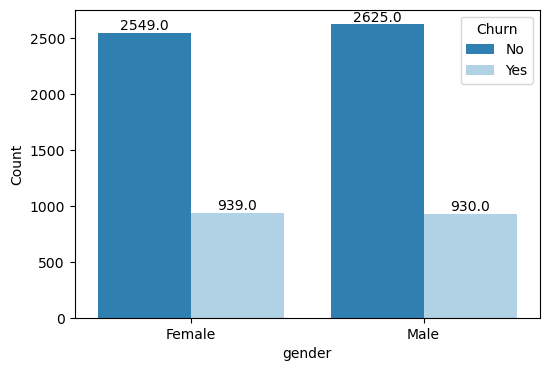

In [32]:
plot_show(cda, 'gender', 'Churn')

In [33]:
def calculate_count_and_percentage(data, column_name):
    # Calculate count and percentage for each category in the specified column
    count_percentage= data[column_name].value_counts(dropna=False).reset_index()
    count_percentage.columns = [column_name, 'Count']
    
    # Check if the column contains numeric values (integer or float)
    if pd.api.types.is_numeric_dtype(data[column_name]):
        count_percentage['Percentage'] = (count_percentage['Count'] / count_percentage['Count'].sum()) * 100
    else:
        # For non-numeric values, calculate percentage using total non-null values
        total_non_null = data[column_name].count()
        count_percentage['Percentage'] = (count_percentage['Count'] / total_non_null) * 100

    # Sort the DataFrame by the column values
    count_percentage.sort_values(by=column_name, inplace=True)

    return count_percentage

In [34]:
calculate_count_and_percentage(cda, 'gender')

,gender,Count,Percentage
1,Female,3488,49.52435
0,Male,3555,50.47565


In [35]:
def calculate_churn_ratio(cda, column_name, target_column='Churn'):
    # Grouping the data by the specified column and 'Churn' columns and calculating the counts
    churn_counts = cda.groupby([column_name, target_column]).size().unstack()

    # Calculating the total counts for each group in the specified column (Yes and No)
    total_counts = cda[column_name].value_counts()

    # Calculate the churn ratio (percentage) for 'Yes' and 'No' in the specified column
    churn_ratio = (churn_counts.T / total_counts) * 100

    # Transpose churn_ratio for better visual
    churn_ratio = churn_ratio.T

    return churn_ratio

In [36]:
calculate_churn_ratio(cda, 'gender')

Churn,No,Yes
Female,73.079128,26.920872
Male,73.839662,26.160338


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li> Among female customers, approximately 73.1% did not churn (Churn=No: 2549), while 26.9% churned (Churn=Yes: 939).</li><br>
<li> For male customers, around 73.8% did not churn (Churn=No: 2625), and 26.2% churned (Churn=Yes: 930).</li><br></font>


<div class="alert alert-info"><font size='3', color='black'>The analysis shows that both male and female customers have similar churn rates, with a slight difference in favor of male customers. The total number of male and female customers is almost evenly distributed.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>2. How does the churn vary between senior citizens and non-senior citizens?</span></font>

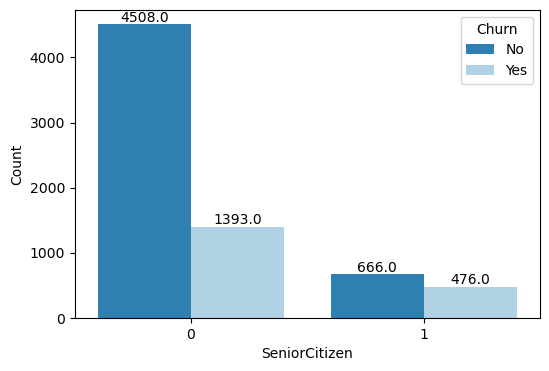

In [37]:
plot_show(cda, 'SeniorCitizen', 'Churn')

In [38]:
calculate_count_and_percentage(cda, 'SeniorCitizen')

,SeniorCitizen,Count,Percentage
0,0,5901,83.785319
1,1,1142,16.214681


In [39]:
calculate_churn_ratio(cda, 'SeniorCitizen')

Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li> Non-senior citizens: Churn=No (4508), Churn=Yes (1393). Total customers: 5901. (84%)</li><br>
<li> Senior citizens: Churn=No (666), Churn=Yes (476). Total customers: 1142. (16%)</li><br>
<li> The majority of non-senior citizens (approximately 76.4%) did not churn, indicating a relatively higher customer retention rate among non-senior customers.</li><br>
<li> In contrast, the churn rate for senior citizens is higher, with around 41.7% of them churning. This suggests that senior citizens are more likely to churn compared to non-senior customers.</li><br></font>  

<div class="alert alert-info"><font size='3', color='black'>The analysis reveals that non-senior citizens exhibit higher retention, while senior citizens have a comparatively higher churn rate.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>3. What is the churn distribution for different Internet Service types?</span></font>

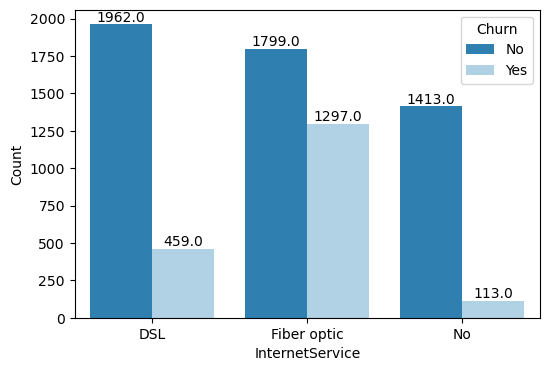

In [40]:
plot_show(cda, 'InternetService', 'Churn')

In [41]:
calculate_count_and_percentage(cda, 'InternetService')

,InternetService,Count,Percentage
1,DSL,2421,34.374556
0,Fiber optic,3096,43.958540
2,No,1526,21.666903


In [42]:
calculate_churn_ratio(cda, 'InternetService')

Churn,No,Yes
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li> DSL Internet Service:

Churn=No: 1962, Churn=Yes: 459.
Churn ratio: 18.9%.

</li><br>
<li> Fiber Optic Internet Service:

Churn=No: 1799, Churn=Yes: 1297.
Churn ratio: 41.9%.</li><br>
<li> 
No Internet Service:

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%.</li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The analysis reveals significant differences in churn ratios based on different Internet service types. Customers with Fiber Optic Internet service show the highest churn ratio of 41.9%, indicating a higher likelihood of customer turnover in this group. On the other hand, customers with DSL Internet service have a relatively lower churn ratio of 18.9%, suggesting a higher likelihood of customer loyalty among DSL users. Additionally, customers with no Internet service have the lowest churn ratio of 7.4%, indicating relatively higher loyalty, possibly due to the absence of Internet service needs and corresponding churn triggers.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>4. How does the churn rate vary across different tenure groups (bins of 12 months)?</span></font>

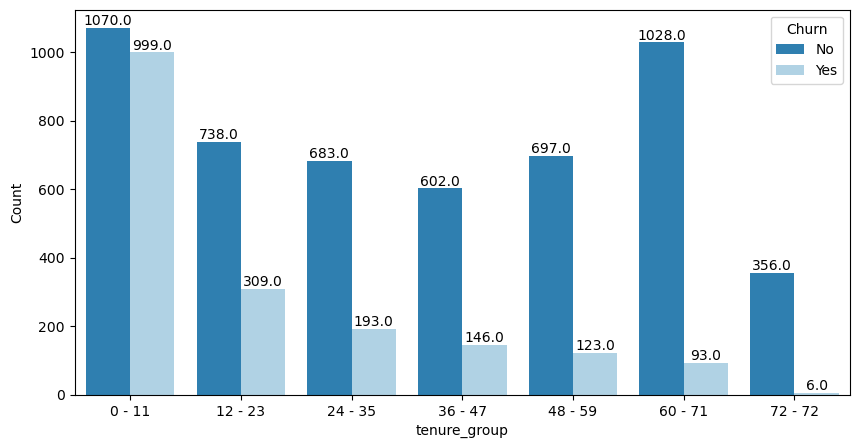

In [43]:
plot_show(cda, 'tenure_group', 'Churn', figsize=(10, 5))

In [44]:
calculate_count_and_percentage(cda, 'tenure_group')

,tenure_group,Count,Percentage
0,0 - 11,2069,29.376686
2,12 - 23,1047,14.865824
3,24 - 35,876,12.437882
5,36 - 47,748,10.620474
4,48 - 59,820,11.642766
1,60 - 71,1121,15.916513
6,72 - 72,362,5.139855


In [45]:
calculate_churn_ratio(cda, 'tenure_group')

Churn,No,Yes
0 - 11,51.715805,48.284195
12 - 23,70.487106,29.512894
24 - 35,77.968037,22.031963
36 - 47,80.481283,19.518717
48 - 59,85.000000,15.000000
60 - 71,91.703836,8.296164
72 - 72,98.342541,1.657459


missing_values = set(cda['tenure_group'].unique()) - set(cda['tenure_group'].dropna().unique())
print("Missing values in 'tenure_group':")
print(missing_values)

cda[cda['tenure_group'].isnull()]

df.head(489)

df[df['tenure'] == 0]

<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>The churn ratio tends to decrease as the tenure period increases. With the highest ratio in the 0-12 months tenure group (51.7%) and the lowest ratio in the 61-72 months tenure group (6.6%).</li><br>
<li>Customers with longer tenure exhibit higher loyalty, making them valuable for the company's long-term success.</li><br></font>  

<div class="alert alert-info"><font size='3', color='black'>This analysis suggests that customer retention efforts should be prioritized for new customers during their early months to improve overall loyalty.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>5. What is the churn distribution for different payment methods?</span></font>  

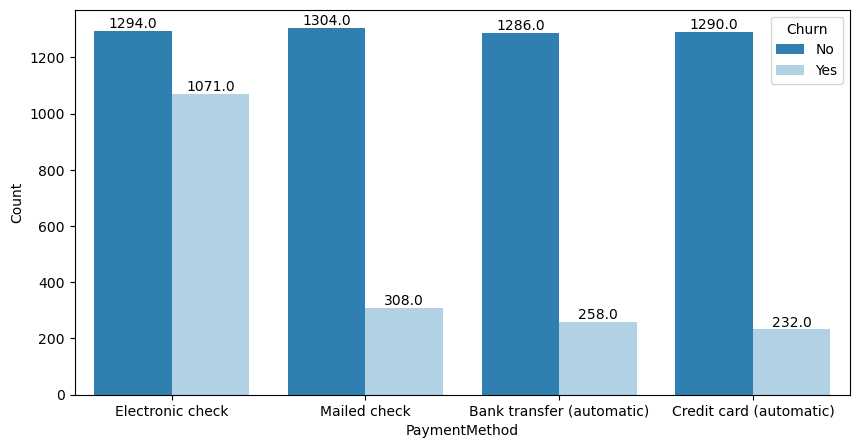

In [46]:
plot_show(cda, 'PaymentMethod', 'Churn', figsize=(10, 5))

In [47]:
calculate_count_and_percentage(cda, 'PaymentMethod')

,PaymentMethod,Count,Percentage
2,Bank transfer (automatic),1544,21.922476
3,Credit card (automatic),1522,21.610109
0,Electronic check,2365,33.579441
1,Mailed check,1612,22.887974


In [48]:
calculate_churn_ratio(cda, 'PaymentMethod')

Churn,No,Yes
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers using Electronic Check exhibit the highest churn ratio of 45.4%, with a Yes to No ratio of 0.83, indicating a higher likelihood of churning compared to other payment methods.</li><br>
<li>Mailed Check customers show the lowest churn ratio of 19.1% and the lowest Yes to No ratio of 0.24, suggesting a higher level of loyalty among this group.</li><br>
<li>Customers using Bank Transfer with automatic payments display a churn ratio of 16.7% and a Yes to No ratio of 0.20.</li><br>
<li>Credit Card users with automatic payments have a churn ratio of 15.2% and a Yes to No ratio of 0.18.</li><br>    
</font>  

<div class="alert alert-info"><font size='3', color='black'> Electronic Check customers exhibit the highest churn rate, warranting attention to improve customer retention strategies for this payment method. Mailed Check customers display the lowest churn rate, indicating higher loyalty. Both Bank Transfer (Automatic) and Credit Card (Automatic) customers have relatively lower churn rates, suggesting moderate loyalty.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>6. How does having dependents affect the likelihood of churn?</span></font>  

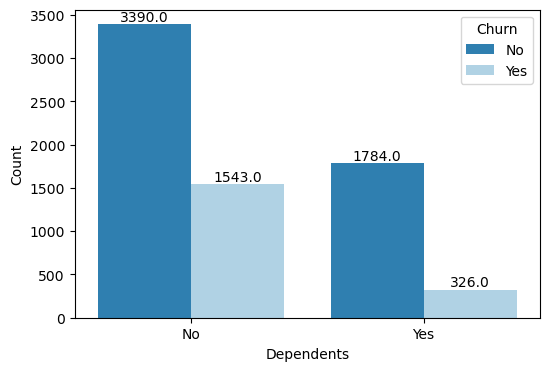

In [49]:
plot_show(cda, 'Dependents', 'Churn')

In [50]:
calculate_count_and_percentage(cda, 'Dependents')

,Dependents,Count,Percentage
0,No,4933,70.041176
1,Yes,2110,29.958824


In [51]:
calculate_churn_ratio(cda, 'Dependents')

Churn,No,Yes
Dependents,,
No,68.720860,31.279140
Yes,84.549763,15.450237


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>No Dependents: Churn=No: 3390, Churn=Yes: 1543.
Churn ratio: 31.3%. Yes to No ratio: 0.45. </li><br>
<li>Dependents (Yes):
Churn=No: 1784, Churn=Yes: 326.
Churn ratio: 15.4%. Yes to No ratio: 0.19. </li><br>
</font>  

<div class="alert alert-info"><font size='3', color='black'>
Customers without dependents have a higher churn ratio of 31.3% (Yes to No ratio: 0.45), indicating a higher likelihood of churning compared to customers with dependents, who exhibit a lower churn ratio of 15.4% (Yes to No ratio: 0.19). The presence of dependents seems to positively influence customer loyalty, as customers with dependents are less likely to churn. The company should consider implementing targeted retention strategies for customers without dependents to improve customer retention and satisfaction. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>7. Does having a partner influence the churn rate?</span></font>  

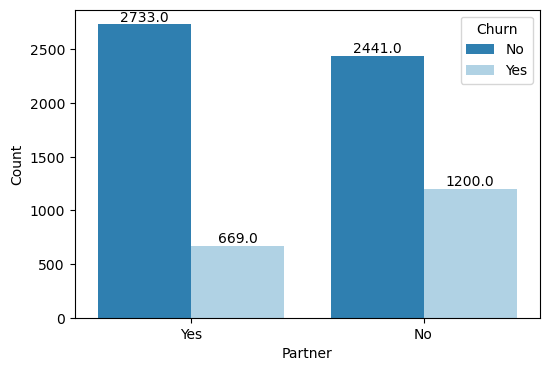

In [52]:
plot_show(cda, 'Partner', 'Churn')

In [53]:
calculate_count_and_percentage(cda, 'Partner')

,Partner,Count,Percentage
0,No,3641,51.69672
1,Yes,3402,48.30328


In [54]:
calculate_churn_ratio(cda, 'Partner')

Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Partner (Yes):

Churn=No: 2733, Churn=Yes: 669.
Churn ratio: 19.7%. </li><br>
    
<li>Customers without Partner (No):

Churn=No: 2441, Churn=Yes: 1200.
Churn ratio: 32.9%. </li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>Customers with a partner (Yes) exhibit a lower churn ratio of 19.7%, indicating a higher likelihood of customer loyalty compared to customers without a partner (No), who have a higher churn ratio of 32.9%. Having a partner appears to have a positive influence on customer retention, as customers with partners are less likely to churn. The company may consider implementing targeted strategies to retain and engage customers without partners to improve overall customer satisfaction and reduce churn. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>8. Does having online backup influence the likelihood of churn?</span></font>  

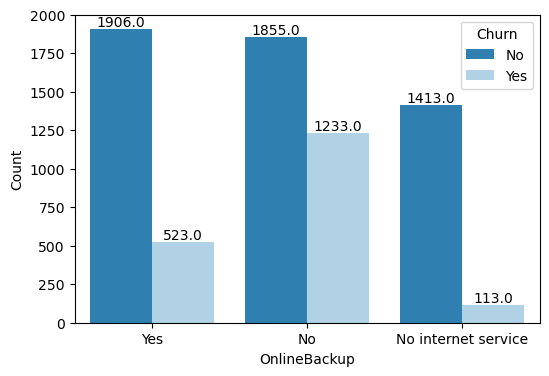

In [55]:
plot_show(cda, 'OnlineBackup', 'Churn')

In [56]:
calculate_count_and_percentage(cda, 'OnlineBackup')

,OnlineBackup,Count,Percentage
0,No,3088,43.844952
2,No internet service,1526,21.666903
1,Yes,2429,34.488144


In [57]:
calculate_churn_ratio(cda, 'OnlineBackup')

Churn,No,Yes
No,60.071244,39.928756
No internet service,92.595020,7.404980
Yes,78.468506,21.531494


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Online Backup (Yes):

Churn=No: 1906, Churn=Yes: 523.
Churn ratio: 21.5%. </li><br>
<li>Customers without Online Backup (No):

Churn=No: 1855, Churn=Yes: 1233.
Churn ratio: 39.9%. </li><br>
<li>Customers with No Internet Service (No Internet service):

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%. </li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>
Customers with online backup (Yes) exhibit a lower churn ratio of 21.5%, indicating a higher likelihood of customer loyalty compared to customers without online backup (No), who have a higher churn ratio of 39.9%. Additionally, customers with no internet service have the lowest churn ratio of 7.4%, suggesting a relatively higher level of loyalty in this group. Having online backup appears to positively influence customer retention, as customers with this feature are less likely to churn. The company may consider promoting and emphasizing the benefits of online backup to further improve customer retention and satisfaction. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>9. What is the churn distribution for different types of contracts (Month-to-month, One-year, Two-year)?</span></font>  

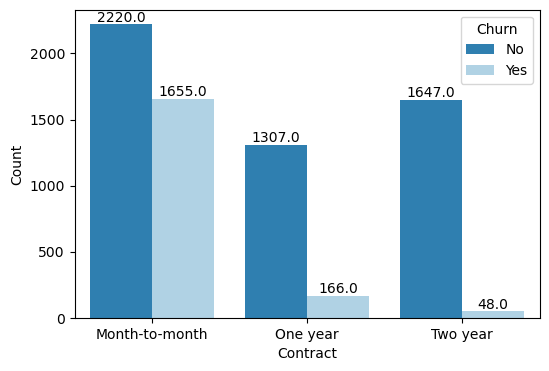

In [58]:
plot_show(cda, 'Contract', 'Churn')

In [59]:
calculate_count_and_percentage(cda, 'Contract')

,Contract,Count,Percentage
0,Month-to-month,3875,55.019168
2,One year,1473,20.914383
1,Two year,1695,24.066449


In [60]:
calculate_churn_ratio(cda, 'Contract')

Churn,No,Yes
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Month-to-Month Contract:

Churn=No: 2220, Churn=Yes: 1655.
Churn ratio: 42.7%. </li><br>
<li>One-Year Contract:

Churn=No: 1307, Churn=Yes: 166.
Churn ratio: 11.3%. </li><br>
<li>Two-Year Contract:

Churn=No: 1647, Churn=Yes: 48.
Churn ratio: 2.8%. </li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The distribution of churn varies significantly among different contract types. Customers with Month-to-Month contracts exhibit the highest churn ratio of 42.7%, suggesting a higher likelihood of customer turnover in this group. <br><br>On the other hand, customers with longer-term contracts, such as One-Year and Two-Year, have lower churn ratios of 11.3% and 2.8%, respectively. This indicates that longer contract durations are associated with higher customer retention rates. 
<br><br>The company may consider encouraging customers to opt for longer-term contracts to improve overall customer loyalty and reduce churn. Additionally, strategies to retain Month-to-Month contract customers should be prioritized to enhance customer retention and satisfaction.





 </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>10. What is the churn distribution based on whether the customer has phone service or not?</span></font>  

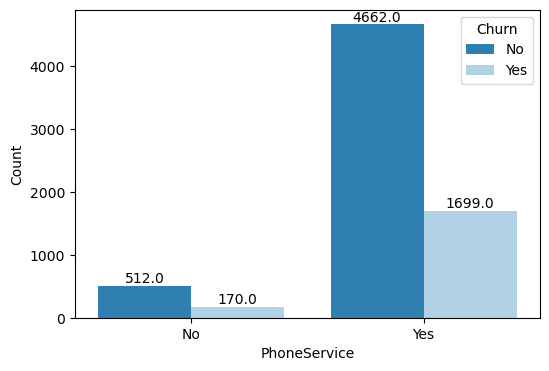

In [61]:
plot_show(cda, 'PhoneService', 'Churn')

In [62]:
calculate_count_and_percentage(cda, 'PhoneService')

,PhoneService,Count,Percentage
1,No,682,9.683374
0,Yes,6361,90.316626


In [63]:
calculate_churn_ratio(cda, 'PhoneService')

Churn,No,Yes
No,75.073314,24.926686
Yes,73.290363,26.709637


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers without Phone Service (No):

Churn=No: 512, Churn=Yes: 170.
Churn ratio: 24.9%. </li><br>
<li>Customers with Phone Service (Yes):

Churn=No: 4662, Churn=Yes: 1699.
Churn ratio: 26.7%. </li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The churn distribution shows that customers with phone service (Yes) have a churn ratio of 26.7%, while customers without phone service (No) have a slightly lower churn ratio of 24.9%. This suggests that having phone service does not significantly impact the likelihood of churn. The company should explore other factors that might influence customer retention and implement retention strategies accordingly. Both customer segments require equal attention to improve overall customer loyalty and reduce churn. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>11. Does having multiple phone lines influence the churn rate?</span></font>  

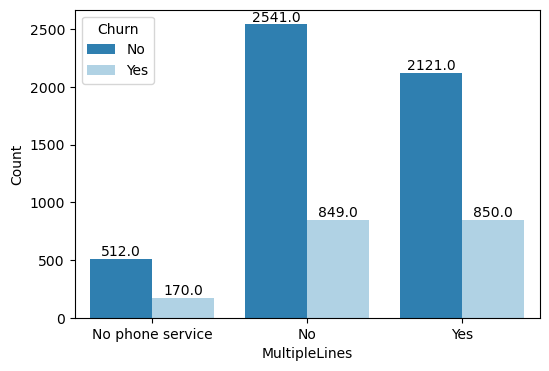

In [64]:
plot_show(cda, 'MultipleLines', 'Churn')

In [65]:
calculate_count_and_percentage(cda, 'MultipleLines')

,MultipleLines,Count,Percentage
0,No,3390,48.132898
2,No phone service,682,9.683374
1,Yes,2971,42.183729


In [66]:
calculate_churn_ratio(cda, 'MultipleLines')

Churn,No,Yes
No,74.955752,25.044248
No phone service,75.073314,24.926686
Yes,71.390104,28.609896


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with No Phone Service (No phone service):

Churn=No: 682, Churn=Yes: 170.
Churn ratio: 24.9%.

 </li><br>
<li>Customers with Single Phone Line (No):

Churn=No: 2541, Churn=Yes: 849.
Churn ratio: 25.0%. </li><br>
<li>Customers with Multiple Phone Lines (Yes):

Churn=No: 2121, Churn=Yes: 850.
Churn ratio: 28.6%. </li>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>The analysis suggests that having multiple phone lines is associated with a slightly higher churn ratio of 28.6% compared to customers with no phone service (24.9%) and customers with a single phone line (25.0%). However, the differences in churn ratios are relatively small, indicating that the number of phone lines alone may not be a significant factor influencing customer retention. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>12. What is the churn distribution for customers with or without online security?</span></font>  

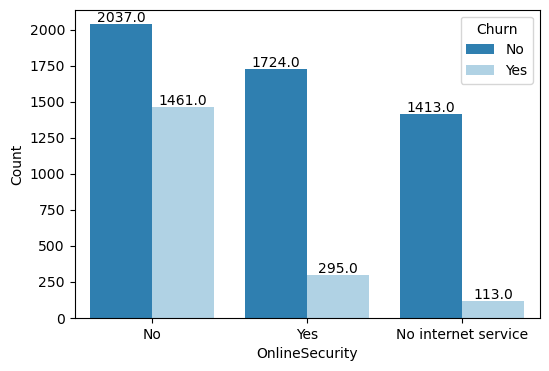

In [67]:
plot_show(cda, 'OnlineSecurity', 'Churn')

In [68]:
calculate_count_and_percentage(cda, 'OnlineSecurity')

,OnlineSecurity,Count,Percentage
0,No,3498,49.666335
2,No internet service,1526,21.666903
1,Yes,2019,28.666761


In [69]:
calculate_churn_ratio(cda, 'OnlineSecurity')

Churn,No,Yes
No,58.233276,41.766724
No internet service,92.595020,7.404980
Yes,85.388806,14.611194


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers without Online Security (No):

Churn=No: 2037, Churn=Yes: 1461. Churn ratio: 41.7% <br>
Customers without online security have a significantly higher churn ratio of 41.7%. This indicates a higher likelihood of customer turnover among those who do not have online security features.</li><br>
    
<li>Customers with Online Security (Yes):

Churn=No: 1724, Churn=Yes: 295. Churn ratio: 14.6% <br>
Customers with online security have a relatively moderate churn ratio of 14.6%. This suggests that having online security features may contribute to a higher likelihood of customer retention. </li><br>
    
<li>Customers with No Internet Service (No internet service):

Churn=No: 1413, Churn=Yes: 113. Churn ratio: 7.4% <br>
Customers with no internet service have the lowest churn ratio of 7.4%. This group shows the highest loyalty among the three categories, possibly due to the absence of internet service needs and corresponding churn triggers.</li><br></font>

    
<div class="alert alert-info"><font size='3', color='black'>The analysis reveals varying churn ratios among customers with different online security statuses. Customers with online security (Yes) exhibit a moderate churn ratio, while those without online security (No) have a higher likelihood of churning. Surprisingly, customers with no internet service have the lowest churn ratio, indicating a higher level of loyalty, potentially influenced by a different set of services or customer preferences.  </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>13. What is the churn distribution for customers with or without tech support?</span></font>  

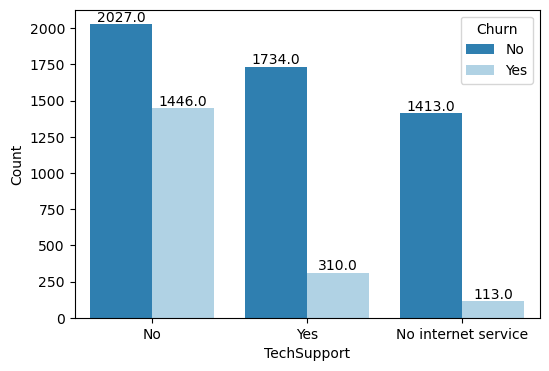

In [70]:
plot_show(cda, 'TechSupport', 'Churn')

In [71]:
calculate_count_and_percentage(cda, 'TechSupport')

,TechSupport,Count,Percentage
0,No,3473,49.311373
2,No internet service,1526,21.666903
1,Yes,2044,29.021724


In [72]:
calculate_churn_ratio(cda, 'TechSupport')

Churn,No,Yes
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Tech Support (Yes):

Churn=No: 1734, Churn=Yes: 310.
Churn ratio: 15.2%.</li><br>
    
<li>Customers without Tech Support (No):

Churn=No: 2027, Churn=Yes: 1446.
Churn ratio: 41.6%. </li><br>

<li>Customers with No Internet Service (No internet service):

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%. </li><br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The analysis reveals significant differences in churn ratios based on the availability of tech support. Customers without tech support (No) have the highest churn ratio of 41.6%, suggesting a higher likelihood of customer turnover in this group. In contrast, customers with tech support (Yes) have a lower churn ratio of 15.2%, indicating a higher likelihood of customer loyalty. Additionally, customers with no internet service have the lowest churn ratio of 7.4%, suggesting relatively higher loyalty, possibly due to the absence of internet service needs and corresponding churn triggers.  </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>14. How does the availability of device protection affect churn?</span></font>  

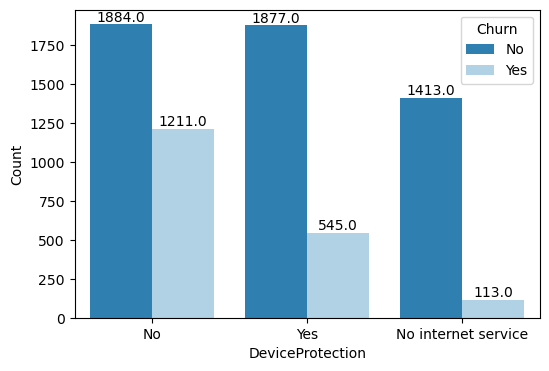

In [73]:
plot_show(cda, 'DeviceProtection', 'Churn')

In [74]:
calculate_count_and_percentage(cda, 'DeviceProtection')

,DeviceProtection,Count,Percentage
0,No,3095,43.944342
2,No internet service,1526,21.666903
1,Yes,2422,34.388755


In [75]:
calculate_churn_ratio(cda, 'DeviceProtection')

Churn,No,Yes
No,60.872375,39.127625
No internet service,92.595020,7.404980
Yes,77.497936,22.502064


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Device Protection (Yes):

Churn=No: 1877, Churn=Yes: 545.
Churn ratio: 22.5%.</li><br>

<li>Customers without Device Protection (No):

Churn=No: 1884, Churn=Yes: 1211.
Churn ratio: 39.1%. </li><br>
    
<li>Customers with No Internet Service (No internet service):

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%. </li><br>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>The analysis highlights the impact of device protection on customer churn. Customers with device protection (Yes) exhibit a lower churn ratio of 22.5%, suggesting a higher likelihood of customer loyalty compared to those without device protection (No) with a churn ratio of 39.1%. Additionally, customers with no internet service have the lowest churn ratio of 7.4%, indicating relatively higher loyalty, possibly due to the absence of internet service needs and corresponding churn triggers. </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>15. Does streaming TV services impact the churn rate?</span></font>  

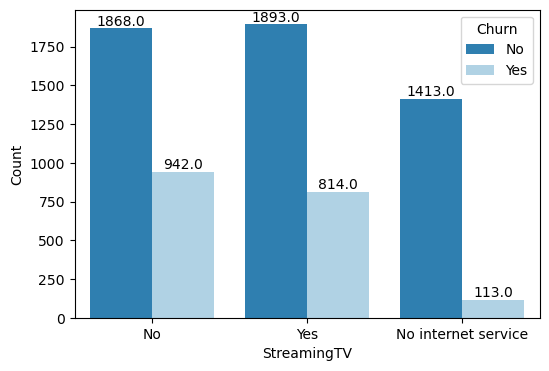

In [76]:
plot_show(cda, 'StreamingTV', 'Churn')

In [77]:
calculate_count_and_percentage(cda, 'StreamingTV')

,StreamingTV,Count,Percentage
0,No,2810,39.897771
2,No internet service,1526,21.666903
1,Yes,2707,38.435326


In [78]:
calculate_churn_ratio(cda, 'StreamingTV')

Churn,No,Yes
No,66.476868,33.523132
No internet service,92.595020,7.404980
Yes,69.929812,30.070188


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Streaming TV Services (Yes):

Churn=No: 1893, Churn=Yes: 814.
Churn ratio: 30.1%.</li><br>

<li>Customers without Streaming TV Services (No):

Churn=No: 1868, Churn=Yes: 942.
Churn ratio: 33.5%.</li><br>
    
<li>Customers with No Internet Service (No internet service):

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%. </li><br>
<br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The analysis reveals that streaming TV services have some impact on the churn rate. Customers with streaming TV services (Yes) exhibit a churn ratio of 30.1%, while those without streaming TV services (No) have a slightly higher churn ratio of 33.5%. Additionally, customers with no internet service have the lowest churn ratio of 7.4%, indicating relatively higher loyalty, possibly due to the absence of internet service needs and corresponding churn triggers.</font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>16. How does streaming movie services affect the likelihood of churn?</span></font>  

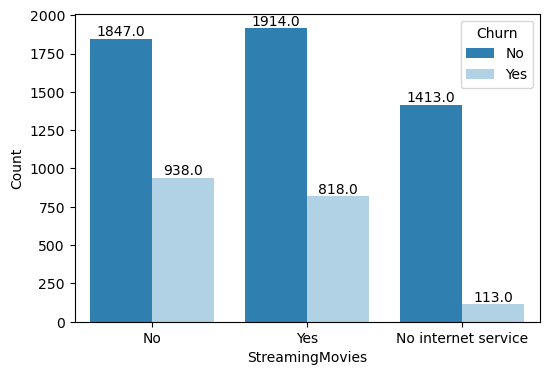

In [79]:
plot_show(cda, 'StreamingMovies', 'Churn')

In [80]:
calculate_count_and_percentage(cda, 'StreamingMovies')

,StreamingMovies,Count,Percentage
0,No,2785,39.542808
2,No internet service,1526,21.666903
1,Yes,2732,38.790288


In [81]:
calculate_churn_ratio(cda, 'StreamingMovies')

Churn,No,Yes
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Streaming Movie Services (Yes):

Churn=No: 1914, Churn=Yes: 818.
Churn ratio: 29.9%.</li><br>
    
<li>Customers without Streaming Movie Services (No):

Churn=No: 1847, Churn=Yes: 938.
Churn ratio: 33.7%. </li><br>
    
<li>Customers with No Internet Service (No internet service):

Churn=No: 1413, Churn=Yes: 113.
Churn ratio: 7.4%. </li><br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The analysis indicates that streaming movie services have some impact on the likelihood of churn. Customers with streaming movie services (Yes) exhibit a churn ratio of 29.9%, while those without streaming movie services (No) have a slightly higher churn ratio of 33.7%. Additionally, customers with no internet service have the lowest churn ratio of 7.4%, indicating relatively higher loyalty, possibly due to the absence of internet service needs and corresponding churn triggers.  </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>17. Does paperless billing influence the churn rate?</span></font>  

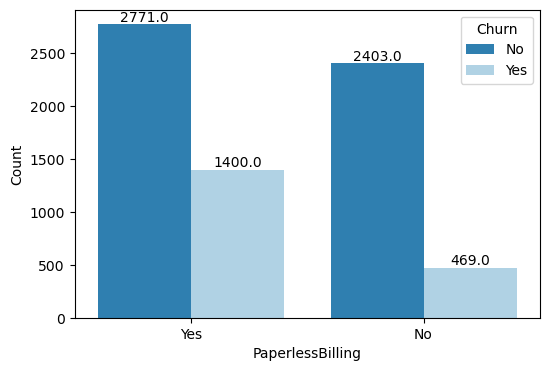

In [82]:
plot_show(cda, 'PaperlessBilling', 'Churn')

In [83]:
calculate_count_and_percentage(cda, 'PaperlessBilling')

,PaperlessBilling,Count,Percentage
1,No,2872,40.778078
0,Yes,4171,59.221922


In [84]:
calculate_churn_ratio(cda, 'PaperlessBilling')

Churn,No,Yes
No,83.669916,16.330084
Yes,66.434908,33.565092


<div class="alert alert-info"><font size='3', color='black'>
<b>Report</b>
<li>Customers with Paperless Billing (Yes):

Churn=No: 2771, Churn=Yes: 1400.
Churn ratio: 33.6%.</li><br>
    
<li>Customers without Paperless Billing (No):

Churn=No: 2403, Churn=Yes: 469.
Churn ratio: 16.3%. </li><br></font>  

<div class="alert alert-info"><font size='3', color='black'>
The analysis indicates that paperless billing has a notable influence on the churn rate. Customers with paperless billing (Yes) exhibit a higher churn ratio of 33.6%, while those without paperless billing (No) have a significantly lower churn ratio of 16.3%. This suggests that customers opting for paperless billing may be more likely to churn compared to those preferring traditional billing methods.  </font> 

</div>
</div>

---

> <font size="4"><span style='color:#1984c5'>18.Relationship between Monthly Charges and Total Charges</span></font>  

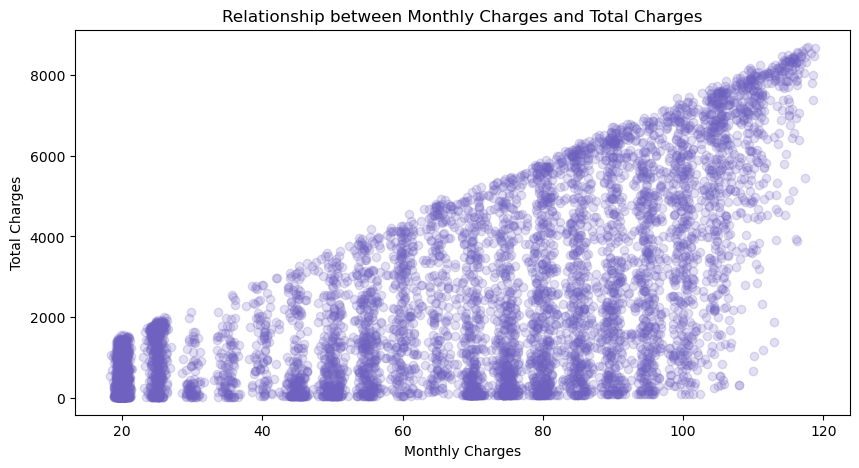

In [85]:
plt.figure(figsize=(10, 5))
plt.scatter(cda['MonthlyCharges'], cda['TotalCharges'], c= '#6F61C0', alpha=0.2)
plt.title('Relationship between Monthly Charges and Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

<div class="alert alert-info"><font size='3', color='black'>
Total charges increase as monthly charges increase as expected</font> 

</div>

> <font size="4"><span style='color:#1984c5'>19. Churn rate by Monthly Charges and Total Charges</span></font>  

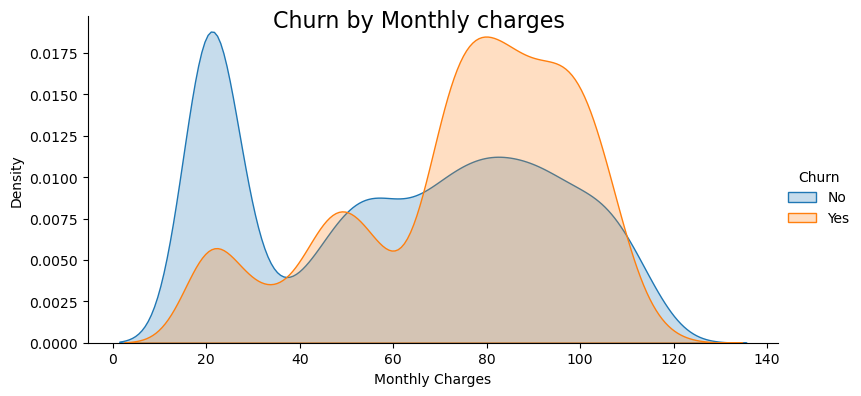

In [86]:
cmc = sns.FacetGrid(cda, hue="Churn", height=4, aspect=2)
cmc.map(sns.kdeplot, "MonthlyCharges", shade=True)
cmc.add_legend(title="Churn")
cmc.set_xlabels("Monthly Charges")
cmc.fig.suptitle("Churn by Monthly charges ", fontsize=16)
plt.show()

<div class="alert alert-info"><font size='3', color='black'>
Higher monthly charge is occuring heigher churn rate.</font> 

</div>

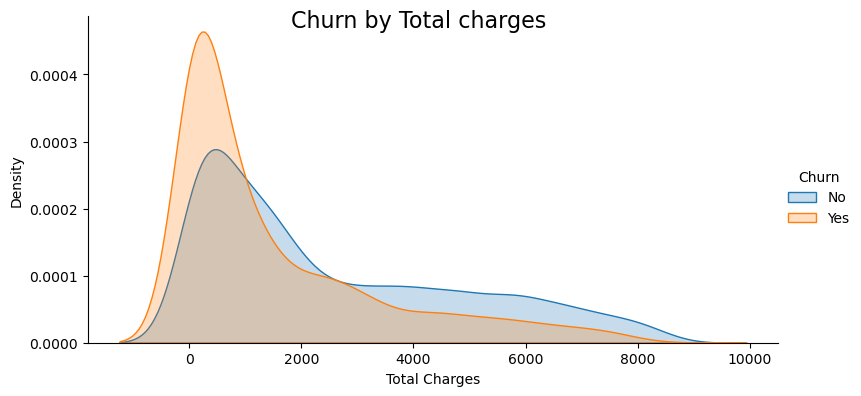

In [87]:
ctc = sns.FacetGrid(cda, hue="Churn", height=4, aspect=2)
ctc.map(sns.kdeplot, "TotalCharges", shade=True)
ctc.add_legend(title="Churn")
ctc.set_xlabels("Total Charges")
ctc.fig.suptitle("Churn by Total charges ", fontsize=16)
plt.show()

<div class="alert alert-info"><font size='3', color='black'>
High churn rate when Low total charges. This is <b>surprising<b></font> 

</div>

# Bivariate Analysis
---

In [107]:
target0=cda.loc[cda["Churn"]==0]
target1=cda.loc[cda["Churn"]==1]

In [159]:
def plot(cda, col, title, hue=None):

    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 15
    plt.rcParams['axes.titlesize'] = 15
    plt.rcParams['axes.titlepad'] = 20

    plt.figure(figsize=(10, 4), )
    ax = sns.countplot(data=cda, x=col, hue=hue, palette='Blues', order=cda[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    plt.show()


> <font size="4"><span style='color:#1984c5'>1. How having a partner affect churn behavior between gender? </span></font>  

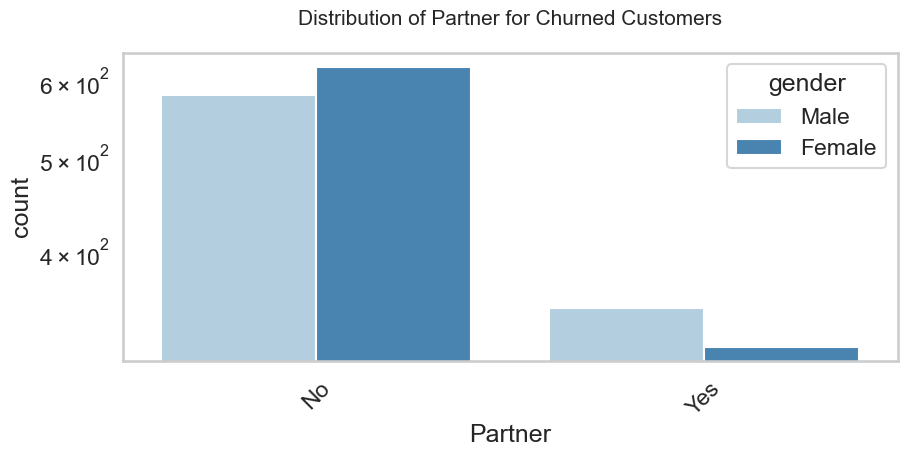

In [160]:
plot(target1, col='Partner', title='Distribution of Partner for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>2. How being dependents for gender affected to churn?</span></font>  

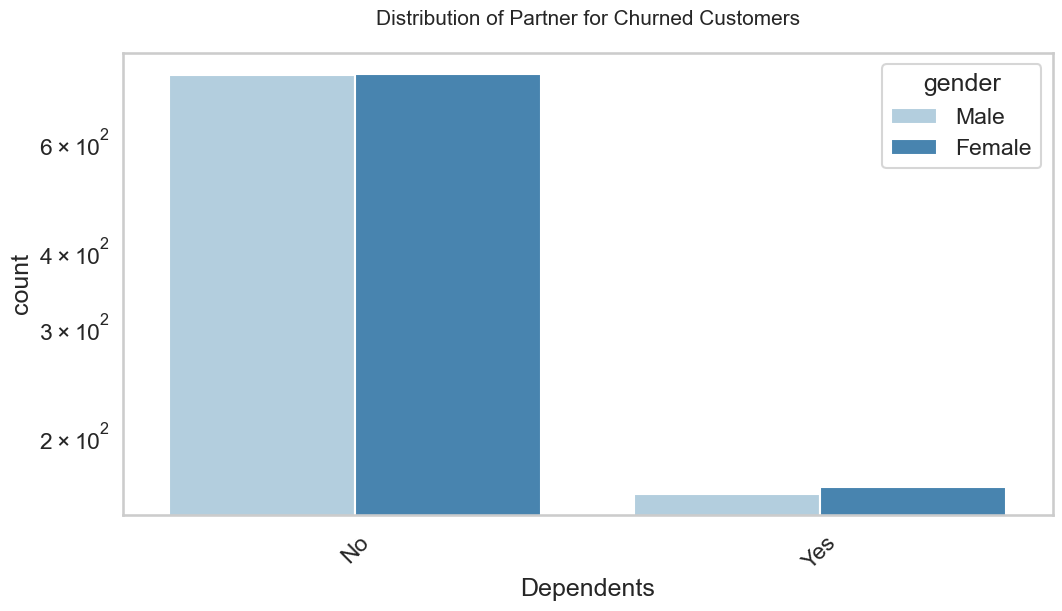

In [144]:
plot(target1, col='Dependents', title='Distribution of Partner for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>3. How Tech support for gender affected to churn?</span></font>  

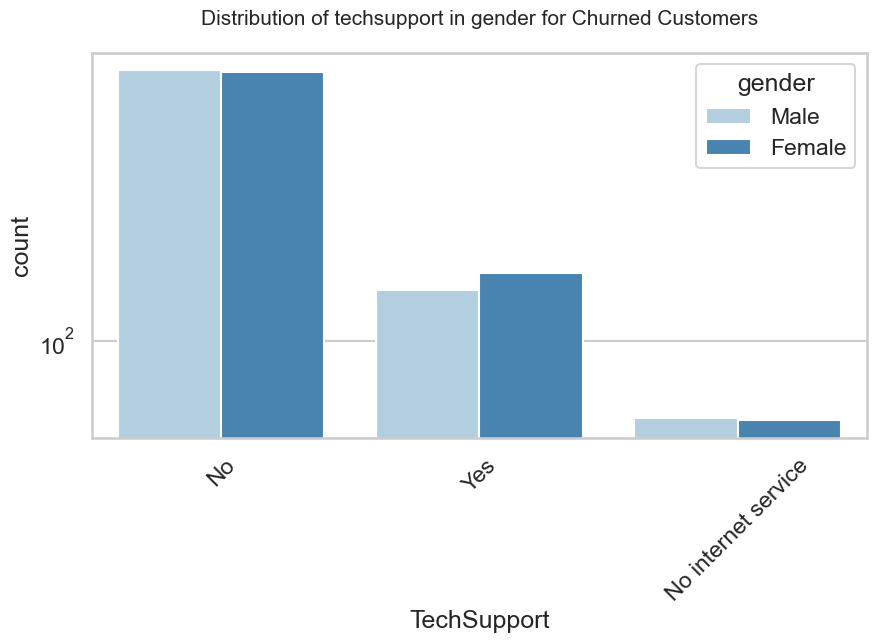

In [153]:
plot(target1, col='TechSupport', title='Distribution of techsupport in gender for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>4.How does the churn behavior vary based on the type of internet service and the presence of a partner?</span></font>  
*  Plot the 'InternetService' column as the 'hue' and 'Partner' column as the 'col' for churned customers.

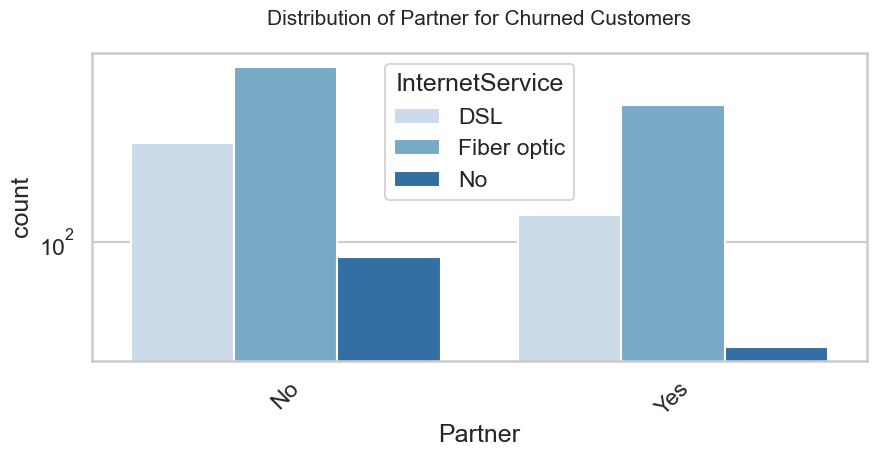

In [161]:
plot(target1, col='Partner', title='Distribution of Partner for Churned Customers', hue='InternetService')


> <font size="4"><span style='color:#1984c5'>5. Is there any difference in churn rates for customers with and without dependents, considering the different payment methods used?</span></font>  
*  Plot the 'Dependents' column as the 'hue' and 'PaymentMethod' column as the 'col' for churned customers.

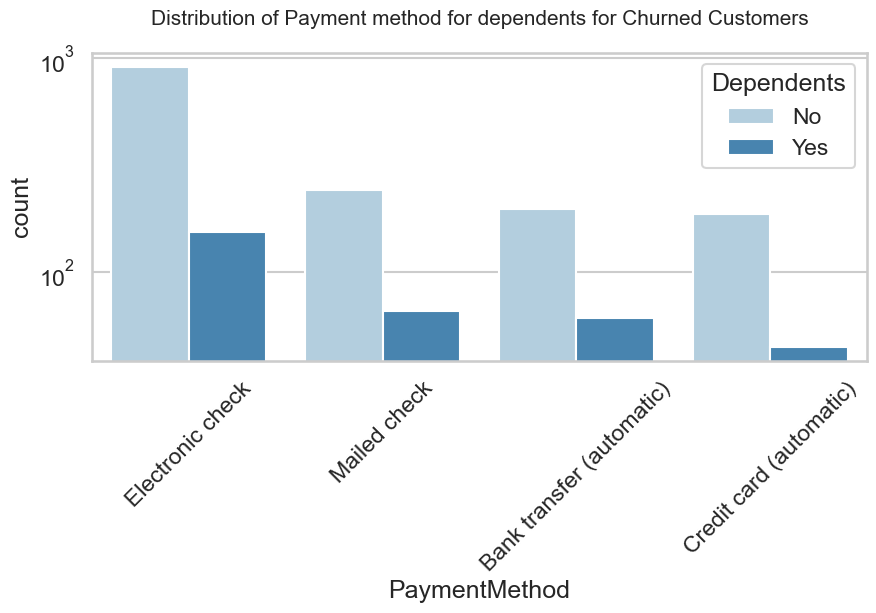

In [162]:
plot(target1, col='PaymentMethod', title='Distribution of Payment method for dependents for Churned Customers', hue='Dependents')


> <font size="4"><span style='color:#1984c5'>6. Does the type of internet service have an impact on churn behavior, and does it differ when considering the contract type?</span></font>  
* Plot the 'InternetService' column as the 'hue' and 'Contract' column as the 'col' for churned customers.

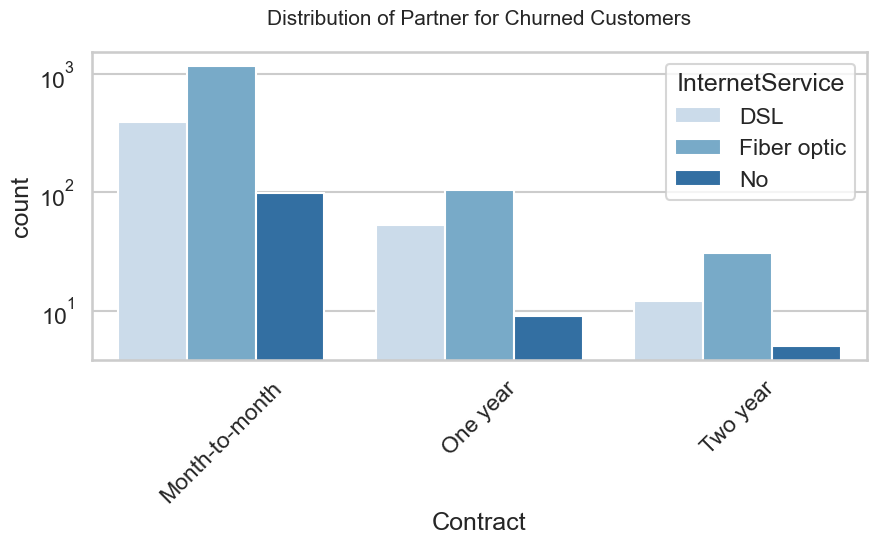

In [163]:
plot(target1, col='Contract', title='Distribution of Partner for Churned Customers', hue='InternetService')


> <font size="4"><span style='color:#1984c5'>7. How does the churn distribution vary based on the payment method and the presence of tech support? </span></font>  
* Plot the 'PaymentMethod' column as the 'hue' and 'TechSupport' column as the 'col' for churned customers.

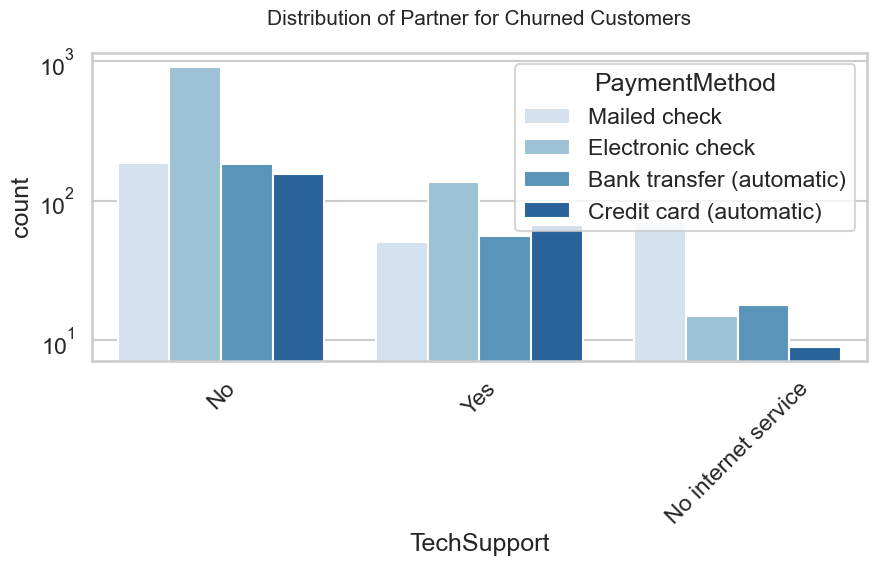

In [164]:
plot(target1, col='TechSupport', title='Distribution of Partner for Churned Customers', hue='PaymentMethod')


> <font size="4"><span style='color:#1984c5'>8. Are there any interactions between the contract type and paperless billing affecting churn? </span></font> 
* Plot the 'Contract' column as the 'hue' and 'PaperlessBilling' column as the 'col' for churned customers.

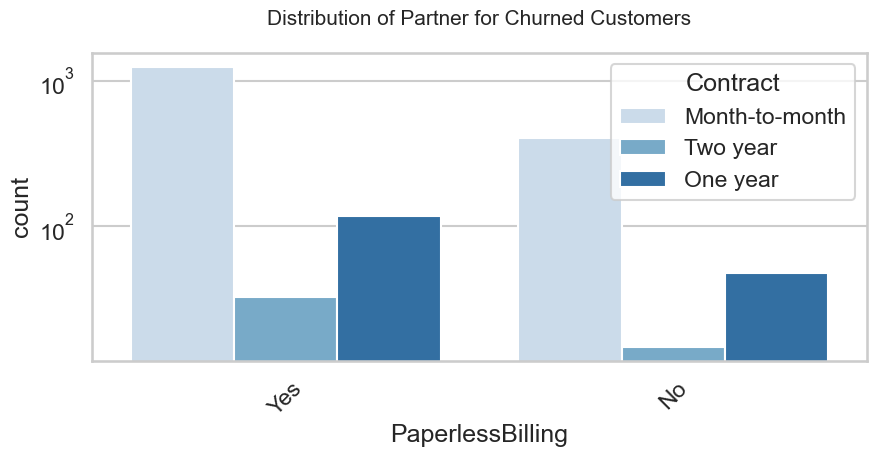

In [165]:
plot(target1, col='PaperlessBilling', title='Distribution of Partner for Churned Customers', hue='Contract')


> <font size="4"><span style='color:#1984c5'>9. How does churn behavior differ for customers with and without tech support, considering the type of internet service they have?</span></font> 
*  Plot the 'TechSupport' column as the 'hue' and 'InternetService' column as the 'col' for churned customers.

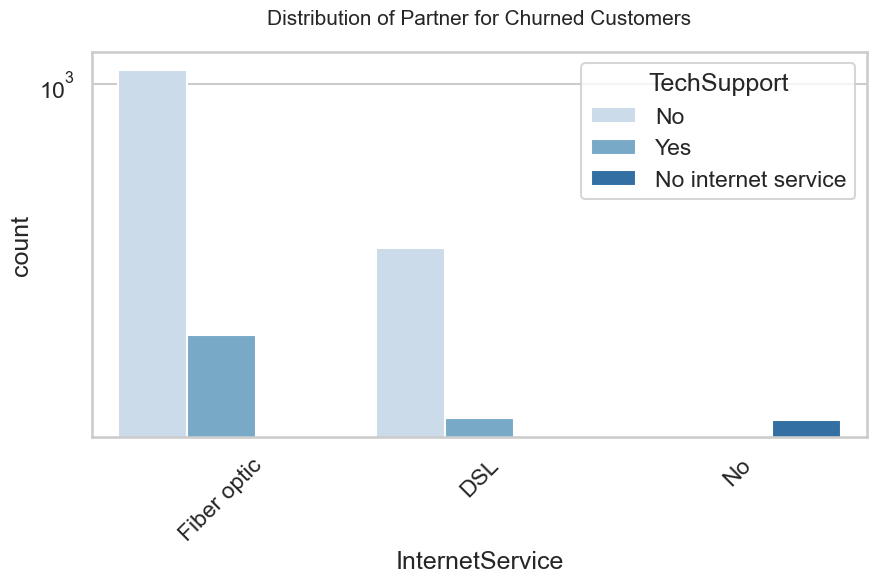

In [152]:
plot(target1, col='InternetService', title='Distribution of Partner for Churned Customers', hue='TechSupport')


> <font size="4"><span style='color:#1984c5'>10. Is there any variation in churn rates based on the internet service and the paperless billing option? </span></font>  
* Plot the 'InternetService' column as the 'hue' and 'PaperlessBilling' column as the 'col' for churned customers.

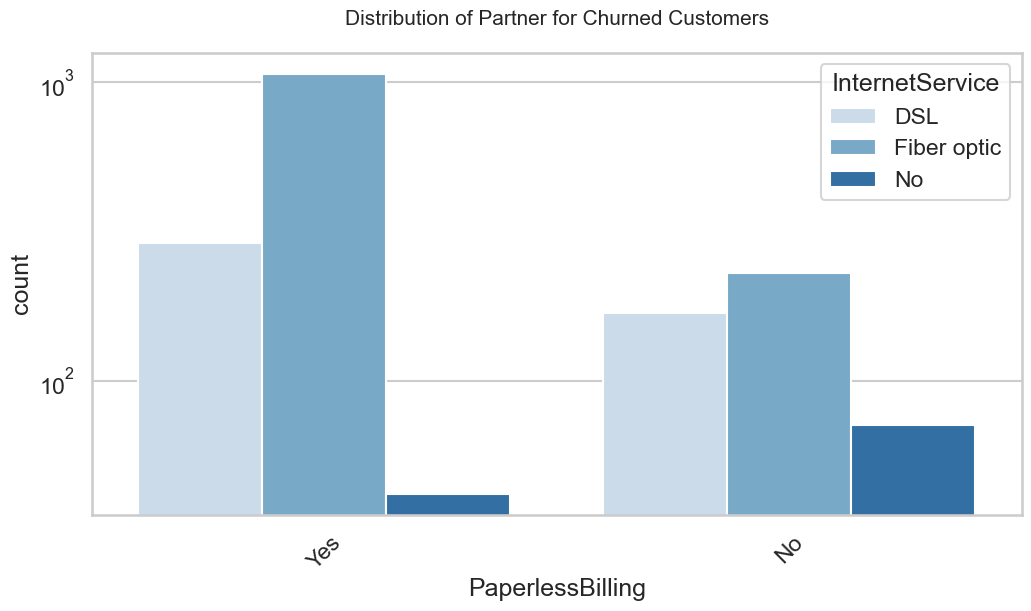

In [135]:
plot(target1, col='PaperlessBilling', title='Distribution of Partner for Churned Customers', hue='InternetService')


> <font size="4"><span style='color:#1984c5'>11. Does the presence of phone service influence churn behavior? Compare churn rates for gender with and without phone service.</span></font>  

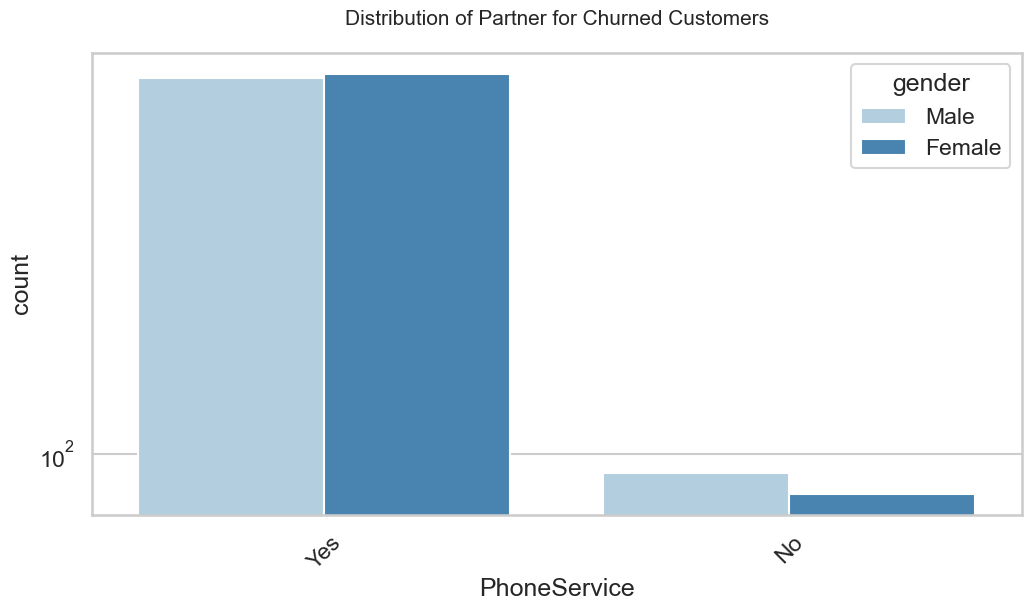

In [136]:
plot(target1, col='PhoneService', title='Distribution of Partner for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>12. Analyze churn rates for different internet service categories among gender.</span></font>  

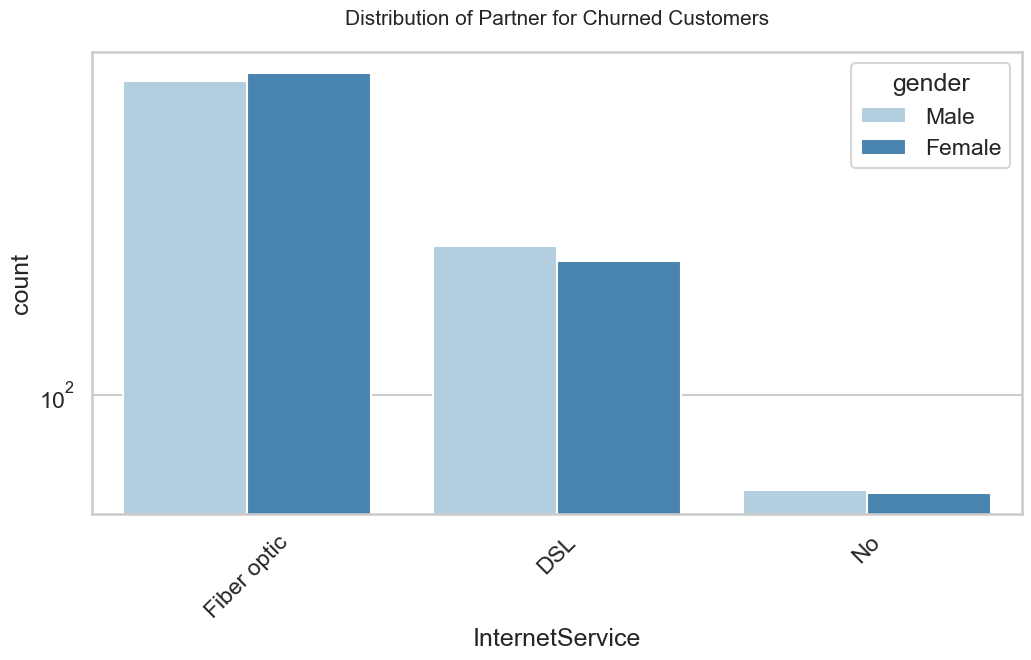

In [137]:
plot(target1, col='InternetService', title='Distribution of Partner for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>13. Analyze churn rates for customers with and without tech support for gender?</span></font>  

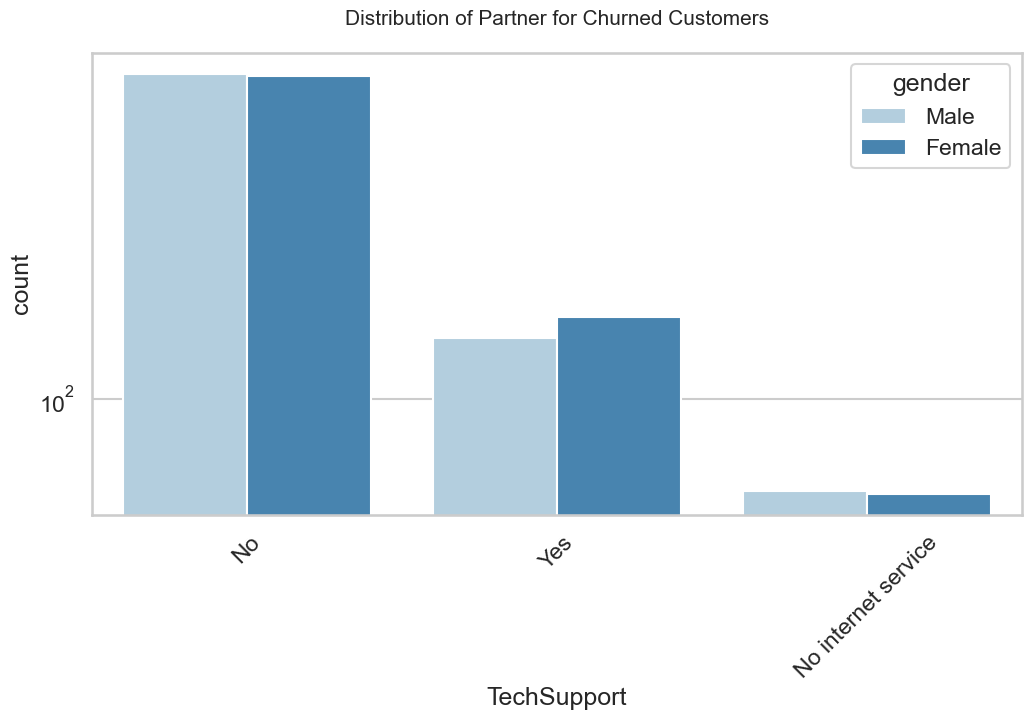

In [138]:
plot(target1, col='TechSupport', title='Distribution of Partner for Churned Customers', hue='gender')


> <font size="4"><span style='color:#1984c5'>14. Does the churn distribution vary based on the tenure group and contract type? </span></font>  

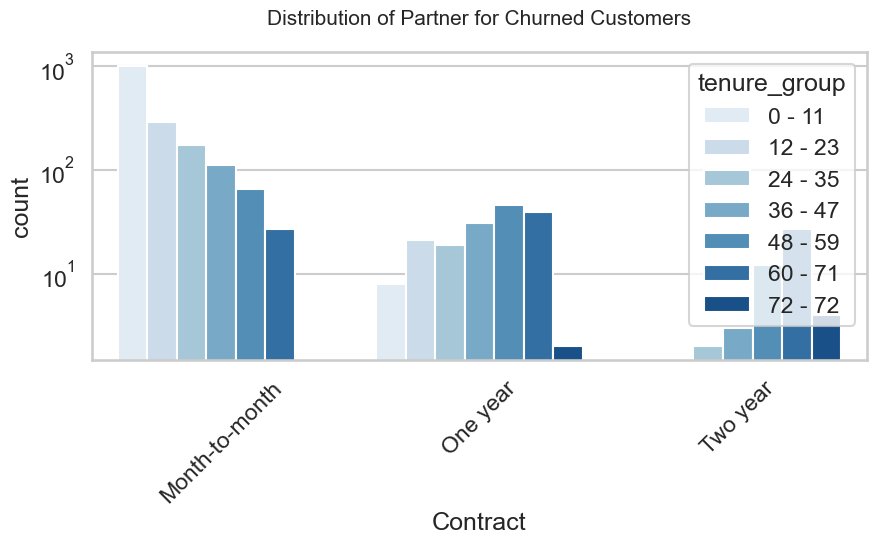

In [166]:
plot(target1, col='Contract', title='Distribution of Partner for Churned Customers', hue='tenure_group')


> <font size="4"><span style='color:#1984c5'>15. Does the churn distribution vary based on the tenure group and gender? </span></font>  

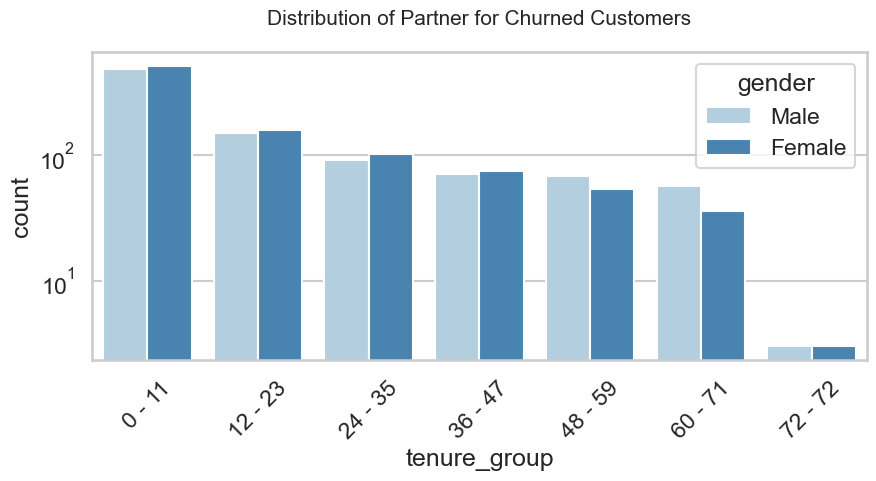

In [167]:
plot(target1, col='tenure_group', title='Distribution of Partner for Churned Customers', hue='gender')

---
<font size="6"><span style='color:#1984c5'><b># Feature Engineering:</b></span></font>

---

### Convert Churn value to numeric form: 'Yes' to 1 and 'No' to 0

In [88]:
cda['Churn'] = cda['Churn'].map({'Yes':'1', 'No':'0'})
cda['Churn'] = pd.to_numeric(cda['Churn'], errors='coerce')

In [89]:
cda.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0 - 11
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24 - 35
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0 - 11
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,36 - 47
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0 - 11


### Convert all the categorical variables into dummy variables, using get_dummies()

* Drop tenure column as we dont need that anymore. We will proceed with tenure_group.
* These dummy variables will be used as input features for machine learning models.
* It is generally recommended to use 'drop_first=True' to avoid the dummy variable trap and ensure more stable and interpretable model results. So, in tis model I will do that to observe model behavior.

In [90]:
cda.drop(['tenure'],  axis=1, inplace=True)

In [91]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']


dummy_data = pd.get_dummies(cda, columns=categorical_columns, drop_first=True)


dummy_data = pd.get_dummies(cda.drop('Churn', axis=1), drop_first=True)

In [92]:
dummy_data.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_12 - 23,tenure_group_24 - 35,tenure_group_36 - 47,tenure_group_48 - 59,tenure_group_60 - 71,tenure_group_72 - 72
0,0,29.85,29.85,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
1,0,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,0,53.85,108.15,1,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,70.70,151.65,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


Build a corelation of all predictors with 'Churn'

<Axes: >

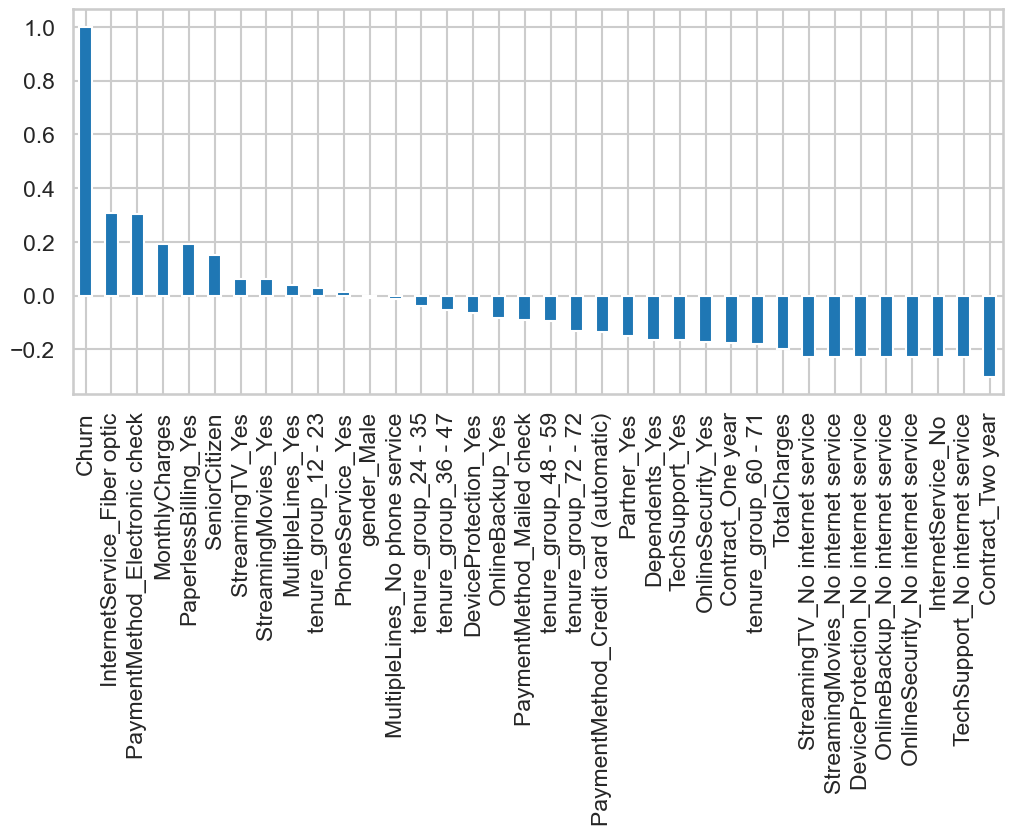

In [170]:
plt.figure(figsize=(12,5))
dummy_data.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

## convert data to csv

In [171]:
dummy_data.to_csv('cleandata.csv')

<div class="alert alert-block alert-success">
<b>Move forward:</b> Now that the dataset 'cleandata' is clean and ready, we can proceed to build the churn prediction machine learning model. I'll use Python and popular machine learning libraries like pandas, scikit-learn, etc. for this task.
</div>
